In [2]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [3]:
"""
    campo_ode(t0, tf, y0, yf, f; N = 10)
    campo_ode!(p, t0, tf, y0, yf, f; N = 10)

Desenha `y'(t) = f(t, y)` na caixa [t0, tf] × [y0, tf].
"""
function campo_ode!(p, t0, tf, y0, yf, f; N = 11)
    rt = range(t0, tf, length=N)
    ry = range(y0, yf, length=N)
    h = rt[2] - rt[1]
    C = vcat([[rt[i], ry[j], 0.9h, f(rt[i], ry[j])]' for i = 1:N, j = 1:N]...)
    C[:,4] /= maximum(abs.(C[:,4]))
    quiver!(p, C[:,1], C[:,2], quiver=(C[:,3],C[:,4]), c=:lightblue)
    scatter!(p, C[:,1], C[:,2], m=(2, :lightblue, stroke(1,:blue)))
    xlims!(t0 - h/2, tf + h/2)
    ylims!(y0 - h/2, yf + h/2)
    p
end

function campo_ode(args...; kwargs...)
    p = plot(leg=false)
    campo_ode!(p, args...; kwargs...)
end

campo_ode (generic function with 1 method)

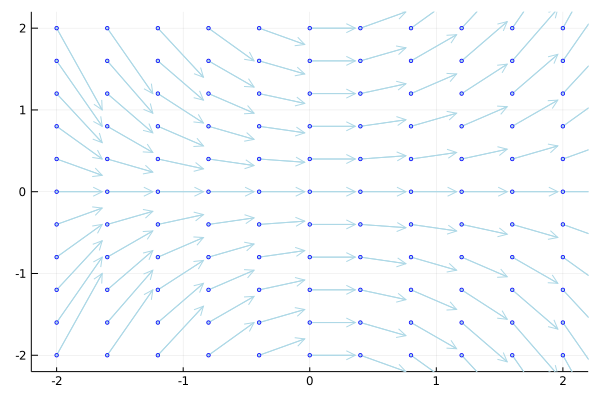

In [4]:
campo_ode(-2, 2, -2, 2, (t,y) -> t * y)

In [5]:
function euler(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        w[k+1] = w[k] + h * f(t[k], w[k])
    end
    return t, w
end

euler (generic function with 1 method)

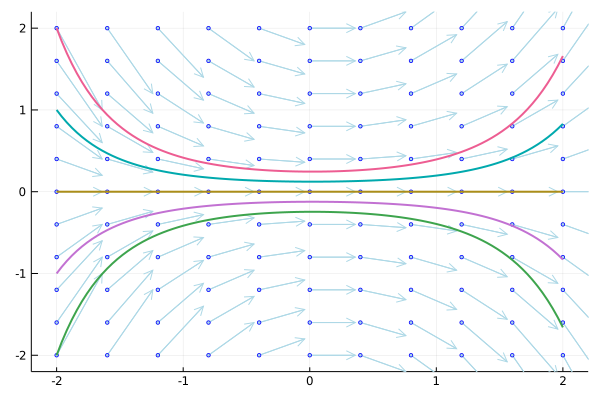

In [6]:
t0, tf = -2.0, 2.0
f(t,y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
for y0 in [-2, -1, 0, 1, 2]
    t, y = euler(t0, tf, y0, f)
    plot!(p, t, y, lw=2)
end
p

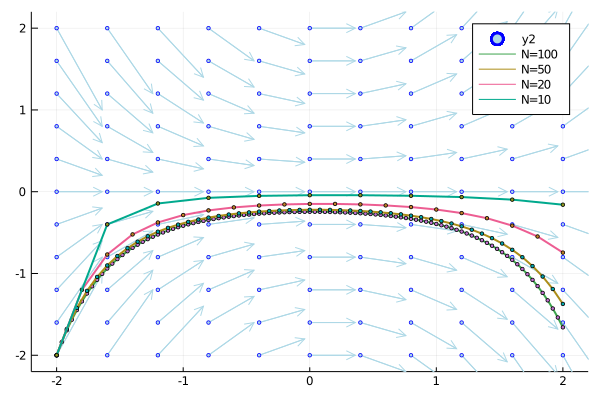

In [7]:
t0, tf = -2.0, 2.0
f(t,y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
y0 = -2
for N = [100, 50, 20, 10]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
    scatter!(p, t, y, lw=2, ms=2, lab="")
end
p

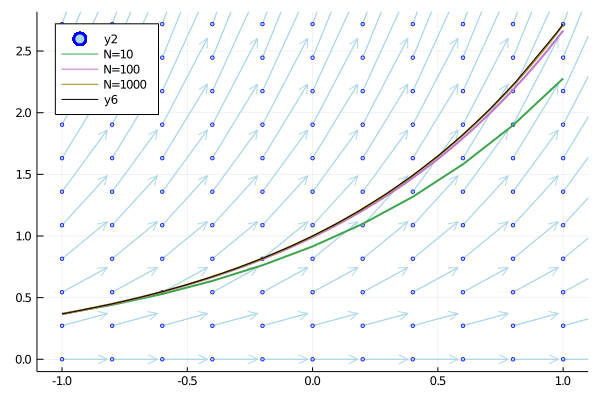

In [8]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
p = campo_ode(t0, tf, 0, ysol(tf), f)
for N = [10, 100, 1000]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
end
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

In [9]:
function taylor2(t0, tf, y0, f, ft, fy; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        fk = f(t[k], w[k])
        ftk = ft(t[k], w[k])
        fyk = fy(t[k], w[k])
        w[k+1] = w[k] + h * fk + h^2 / 2 * (ftk + fyk * fk)
    end
    return t, w
end

taylor2 (generic function with 1 method)

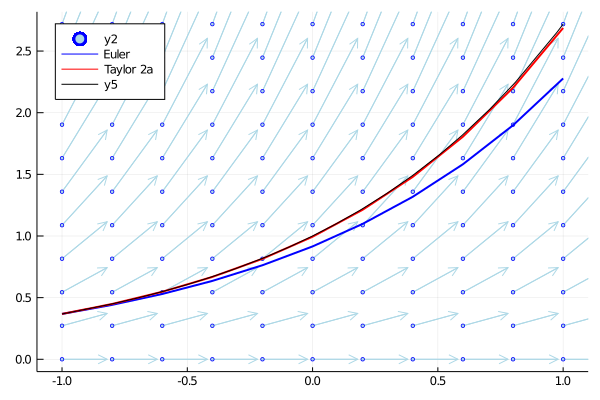

In [10]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

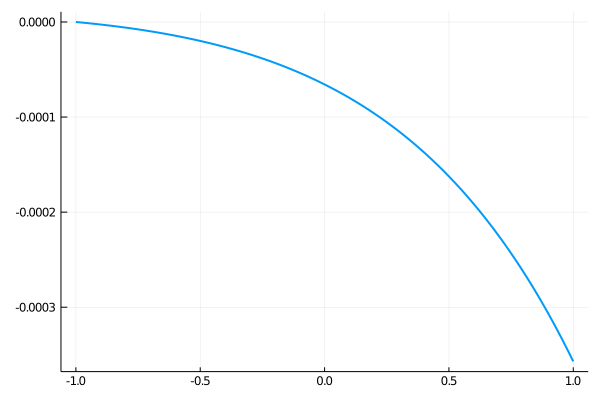

In [11]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
# t, y = euler(t0, tf, y0, f, N=100)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=100)
plot(t, y - ysol.(t), lw=2, leg=false)


In [12]:
function rungekutta2(t0, tf, y0, f, β; N = 100)
    @assert β != 0
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    α = 1 - β
    δ = γ = 1 / 2β
    for k = 1:N
        θ₁ = f(t[k], w[k])
        θ₂ = f(t[k] + δ * h, w[k] + γ * h * θ₁)
        w[k+1] = w[k] + h * (α * θ₁ + β * θ₂)
    end
    return t, w
end

rungekutta2 (generic function with 1 method)

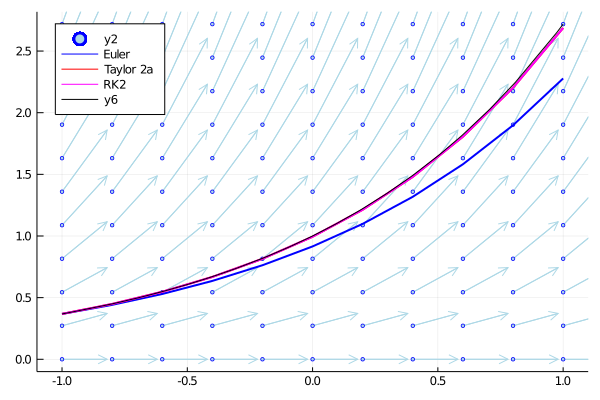

In [13]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=10)
plot!(p, t, y, lw=2, lab="RK2", c=:magenta, leg=true)
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

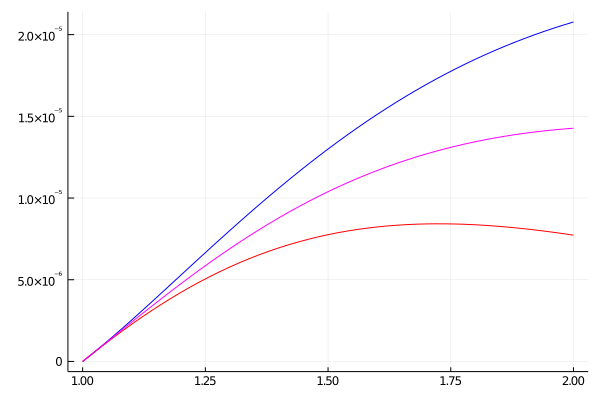

In [14]:
#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#
t0, tf = 1.0, 2.0
ysol(t) = t^2 * exp(-t)
y0 = ysol(t0)
f(t,y) = 2y / t - y

plot(leg=false)
t, y = rungekutta2(t0, tf, y0, f, 0.5, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:blue)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:red)
t, y = rungekutta2(t0, tf, y0, f, 2/3, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:magenta)

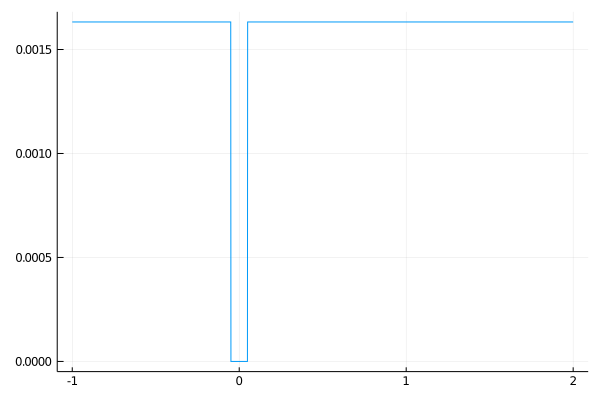

In [15]:
using LinearAlgebra

#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#
t0, tf = 1.0, 2.0
# ysol(t) = t^2 * exp(-t)
# f(t,y) = 2y / t - y
ysol(t) = exp(t)
f(t,y) = y
y0 = ysol(t0)

E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end

plot(E, -1, 2, leg=false)

## Sistemas

In [17]:
function rungekutta4sist(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    m = length(y0)
    w = zeros(m, N+1)
    w[:,1] = y0
    for k = 1:N
        θ₁ = f(t[k], w[:,k])
        θ₂ = f(t[k] + h / 2, w[:,k] + h * θ₁ / 2)
        θ₃ = f(t[k] + h / 2, w[:,k] + h * θ₂ / 2)
        θ₄ = f(t[k] + h, w[:,k] + h * θ₃)
        w[:,k+1] = w[:,k] + h * (θ₁ + 2θ₂ + 2θ₃ + θ₄) / 6
    end
    return t, w
end

rungekutta4sist (generic function with 2 methods)

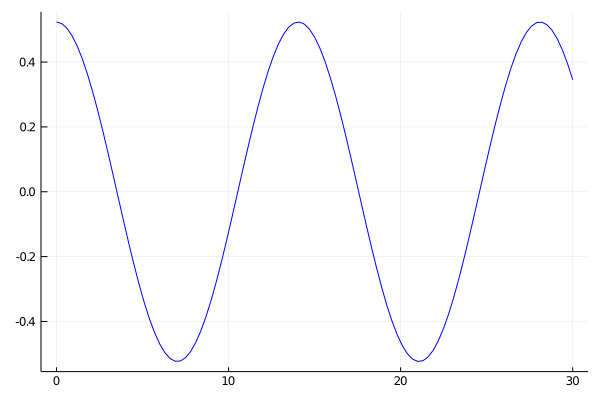

In [18]:
g = 1.0
ℓ = 5.0
F(t, Y) = [Y[2]; -g * Y[1] / ℓ]

θ₀ = π / 6
ω₀ = 0.0

t0 = 0.0
tf = 30.0
y0 = [θ₀; ω₀]

t, w = rungekutta4sist(t0, tf, y0, F)
plot(t, w[1,:], c=:blue, leg=false)

┌ Warning: Assignment to `y` in soft scope is ambiguous because a global variable by the same name exists: `y` will be treated as a new local. Disambiguate by using `local y` to suppress this warning or `global y` to assign to the existing global variable.
└ @ nothing In[23]:4
┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif")
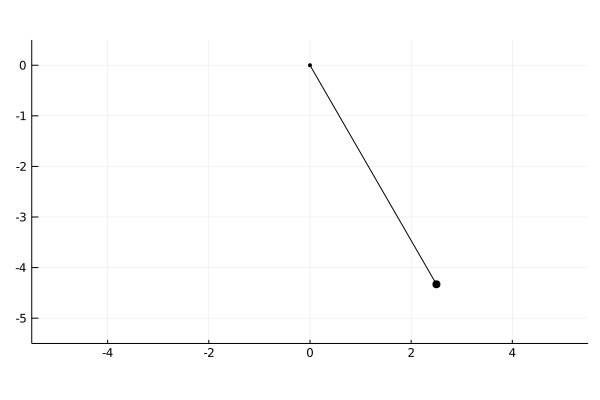

In [23]:
@gif for i = 1:size(w, 2)
    θ = w[1,i]
    x = ℓ * sin(θ)
    y = -ℓ * cos(θ)
    scatter([0.0], [0.0], c=:black, ms=3, leg=false, ratio=:equal)
    plot!([0.0; x], [0.0; y], c=:black)
    scatter!([x], [y], c=:black, ms=5)
    xlims!(-1.1ℓ, 1.1ℓ)
    ylims!(-1.1ℓ, 0.1ℓ)
end every 1

## Presa-predador

In [51]:
β, γ, δ = [0.5; 0.5; 0.75]
αf(t) = abs(t - 10) < 2 ? 0.1 : 1.0

F(t, Y) = [αf(t) * Y[1] - β * Y[1] * Y[2]; γ * Y[1] * Y[2] - δ * Y[2]]

y0 = [3.0; 1.0]

t0 = 0.0
tf = 20.0

t, w = rungekutta4sist(t0, tf, y0, F, N=200)
# plot(t, w[1,:], c=:blue, lab="Presa")
# plot!(t, w[2,:], c=:red, lab="Predador")

(0.0:0.1:20.0, [3.0 3.1475483800035993 … 0.20569678972837616 0.21689919832202045; 1.0 1.0818923168778474 … 0.9700473172250181 0.9095087525160696])

┌ Warning: Assignment to `p` in soft scope is ambiguous because a global variable by the same name exists: `p` will be treated as a new local. Disambiguate by using `local p` to suppress this warning or `global p` to assign to the existing global variable.
└ @ nothing In[52]:4
┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif")
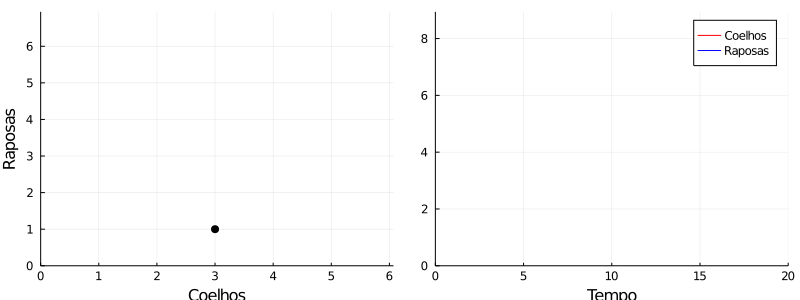

In [52]:
N = length(t)
@gif for i = 1:N
    layout = @layout [a b]
    p = plot(size=(800,300), layout=layout)
    xi, yi = w[:,i]
    plot!(p[1], w[1,1:i], w[2,1:i], c=:black, leg=false)
    scatter!(p[1], [xi], [yi], c=:black, ms=5)
    xlabel!(p[1], "Coelhos")
    ylabel!(p[1], "Raposas")
    xlims!(p[1], 0, maximum(w[1,:]) + 0.5)
    ylims!(p[1], 0, maximum(w[2,:]) + 0.5)
    plot!(p[2], t[1:i], w[1,1:i], c=:red, lab="Coelhos")
    plot!(p[2], t[1:i], w[2,1:i], c=:blue, lab="Raposas")
    xlims!(p[2], 0, t[end])
    ylims!(p[2], 0, maximum(w) + 2.5)
    xlabel!(p[2], "Tempo")
end every 2